# Probability

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<img src="https://drive.google.com/uc?id=1Fev1pOn8NeCpwIPW0VN2xaeLvj8nwbU8" width=320 height=640>

for example, let us random generate the numbers of trials($n_{ij}$)

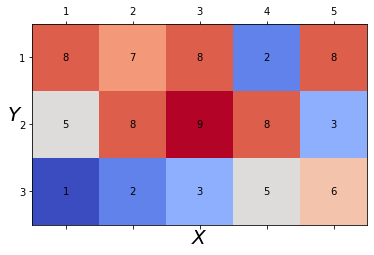

In [3]:
np.random.seed(777)
A = np.random.randint(1, 10, size=(3, 5))
fig, ax = plt.subplots(1, 1)
ax.matshow(A, cmap="coolwarm")

for (i, j), z in np.ndenumerate(A):
    ax.text(j, i, f"{z}", ha="center", va="center")
ax.set_xticklabels(np.arange(0, 6))
ax.set_yticklabels(np.arange(0, 4))
ax.set_xlabel("$X$", fontsize=20)
ax.set_ylabel("$Y$", fontsize=20).set_rotation(0)

plt.show()
# fig.savefig(str(fig_path/"1.2.3-probexample.png"))

so the probability of $p(X=x_i, Y=y_j)$ is following function.

In [14]:
def joint_probability(i, j, A):
    """
    i: x element(column of A)
    j: y element(row of A)
    """
    return A[j, i] / A.size

# x_1, y_2 --> 5/15
p_x1y2 = joint_probability(0, 1, A)
print(round(p_x1y2, 4))

0.3333


In [19]:
def marginal_probability(i, A, axis=0):
    """
    i: x element(column of A)
    """
    A_sum = A.sum(axis=axis)
    return A_sum[i] / A_sum.sum()

# x_1 --> (8 + 5 + 1) / 83
p_x1 = marginal_probability(0, A, axis=0)
print(round(p_x1, 4))

0.1687


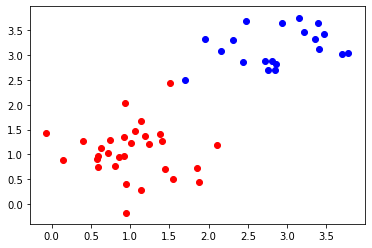

In [95]:
np.random.seed(99)
x1 = np.random.normal(1.0, .5, size=(30, 2))
x2 = np.random.normal(3.0, .5, size=(20, 2))
plt.scatter(x1[:, 0], x1[:, 1], label="x1", c="r")
plt.scatter(x2[:, 0], x2[:, 1], label="x2", c="b")
plt.show()

In [96]:
rng = [-0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
X = np.concatenate((x1, x2))
X_prob_cnt = []
for a, b in zip(rng[:-1], rng[1:]):
    cnt = 0
    for x in sorted(X[:, 0]):
        if x <= b and x > a:
            cnt += 1
    print(a, b, cnt)
    X_prob_cnt.append(cnt)
X_prob_cnt

-0.5 0 1
0 0.5 2
0.5 1.0 13
1.0 1.5 9
1.5 2.0 6
2.0 2.5 5
2.5 3.0 6
3.0 3.5 6
3.5 4.0 2


[1, 2, 13, 9, 6, 5, 6, 6, 2]

<BarContainer object of 9 artists>

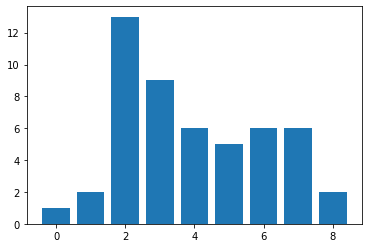

In [97]:
plt.bar(np.arange(len(X_prob_cnt)), height=X_prob_cnt)

In [98]:
x1_max = x1[:, 1].max()
x2_min = x2[:, 1].min()
assert x1_max < x2_min, "조건을 만족해야합니다."

In [99]:
Y_prob_cnt = []
cnt1 = 0
cnt2 = 0
for y in sorted(X[:, 1]):
    if y <= x1_max:
        cnt1 += 1
    else:
        cnt2 += 1
Y_prob_cnt.append(cnt1)
Y_prob_cnt.append(cnt2)
Y_prob_cnt

[30, 20]

<BarContainer object of 2 artists>

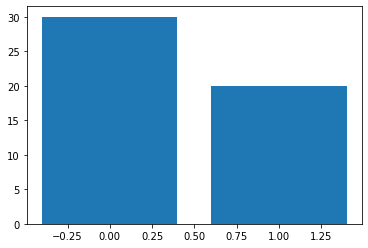

In [100]:
plt.bar(np.arange(len(Y_prob_cnt)), height=Y_prob_cnt)

In [101]:
rng

[-0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

In [102]:
X = np.concatenate((x1, x2))
XY_prob_cnt = []
for a, b in zip(rng[:-1], rng[1:]):
    cnt = 0
    for x, y in X:
        if x <= b and x > a and y <= x1_max:
            cnt += 1
    XY_prob_cnt.append(cnt)

In [103]:
XY_prob_cnt

[1, 2, 13, 9, 4, 1, 0, 0, 0]

<BarContainer object of 9 artists>

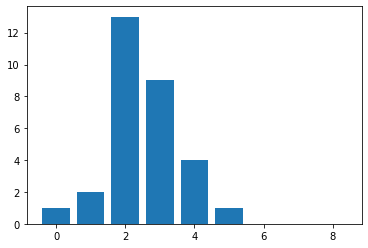

In [104]:
plt.bar(np.arange(len(XY_prob_cnt)), height=XY_prob_cnt)

<BarContainer object of 9 artists>

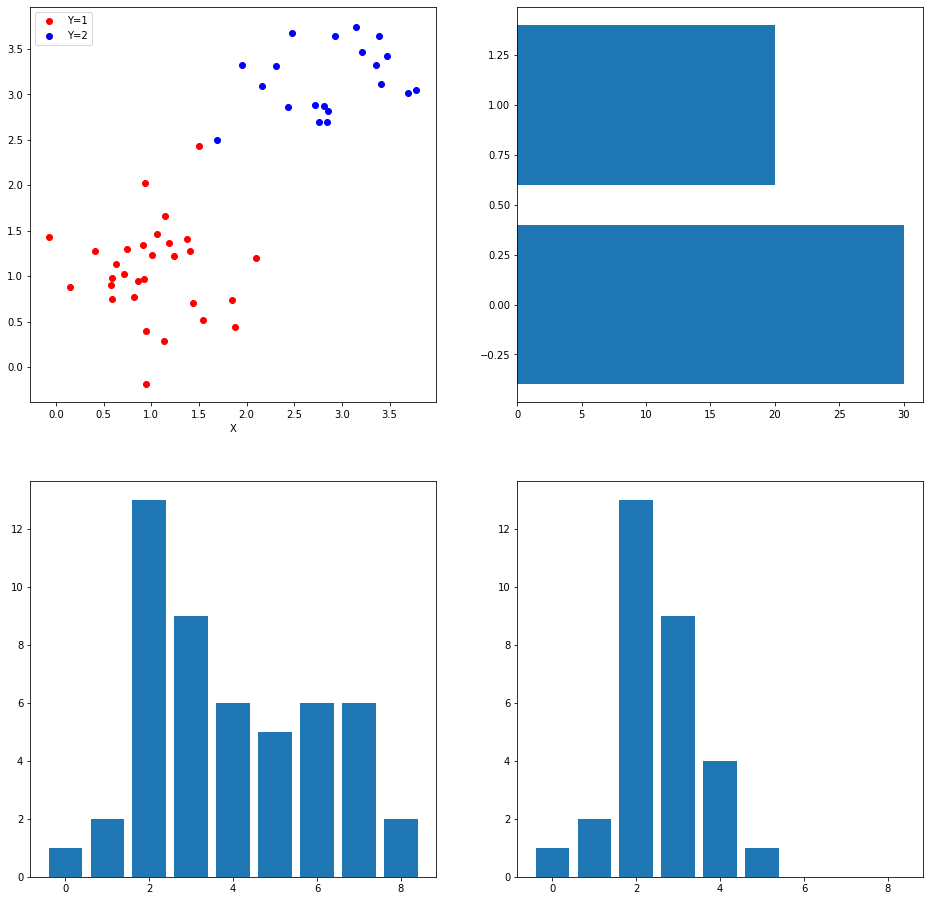

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
(ax1, ax2), (ax3, ax4) = axes
ax1.scatter(x1[:, 0], x1[:, 1], label="Y=1", c="r")
ax1.scatter(x2[:, 0], x2[:, 1], label="Y=2", c="b")
ax1.legend(loc="upper left")
ax1.set_xlabel("X")
ax2.barh(np.arange(len(Y_prob_cnt)), width=Y_prob_cnt)
ax3.bar(np.arange(len(X_prob_cnt)), height=X_prob_cnt)
ax4.bar(np.arange(len(XY_prob_cnt)), height=XY_prob_cnt)

MLE

In [1]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
def binomial(theta, n, x):
    """
    theta: probability
    n: number of trials
    x: number of value that random variable X can be
    """
    return comb(n, x) * (theta**x) * (1-theta)**(n-x)

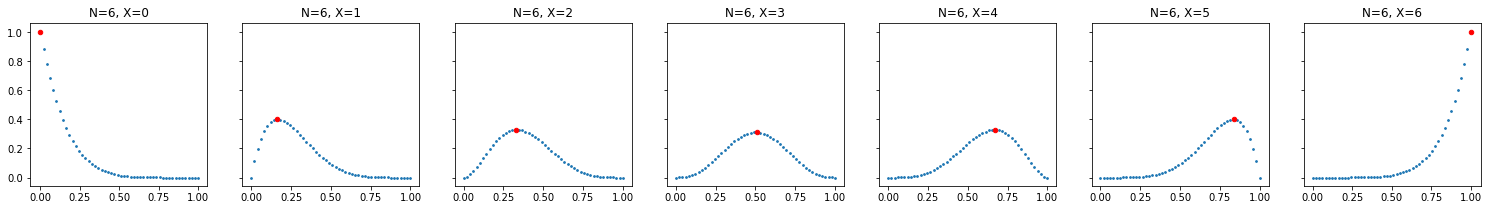

In [3]:
probs = np.linspace(0, 1, num=50)
N = 6
X = np.arange(0, N+1)

H = N // 6
fig, axes = plt.subplots(1, N+1, figsize=(26, 3), sharey=True)
for x, ax in zip(X, axes):
    L = binomial(probs, N, x)
    max_y, max_x = L.max(), probs[L.argmax()]
    ax.scatter(probs, L, s=3)
    ax.scatter(max_x, max_y, s=20, c="red")
    ax.set_title(f"N={N}, X={x}")
plt.show()

In [4]:
def normal_dist(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(1/(2*sigma**2))*(x-mu)**2)

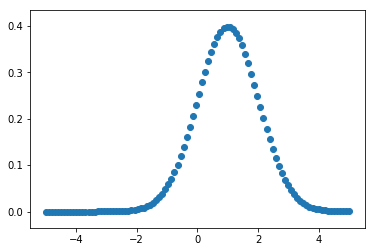

In [5]:
delta = 0.01
X = np.linspace(-5, 5, 100)
mu, sigma = 1, 1
Y = normal_dist(X, mu, sigma)
plt.scatter(X, Y)
plt.show()

## Binomial - Bayesian